In [1]:
#os.environ['OPENAI_API_KEY'] = <your-api-key>
import os
from openai import OpenAI

api_key = os.getenv('OPENAI_API_KEY')

https://github.com/langchain-ai/rag-from-scratch/blob/main/rag_from_scratch_5_to_9.ipynb

In [1]:

from python_functions import data_loader


# Load the processed data
Hotel_Reviews = data_loader()

FileNotFoundError: [Errno 2] No such file or directory: '../Scraping/crete_11_12_2024.csv'

In [3]:
from langchain_text_splitters import RecursiveCharacterTextSplitter



# Merge the columns using string concatenation
Hotel_Reviews['MergedColumn'] = (
     '' +'Hotel: ' + Hotel_Reviews['Hotel_Name'] + 
    '. Positive Guest Review: ' + Hotel_Reviews['Positive_Review'] + 
    '. ' +'Hotel: ' + Hotel_Reviews['Hotel_Name'] + 
    '. Negative Guest Review: '+ Hotel_Reviews['Negative_Review'] + "\n"
)
# Select the first 100 rows of the merged column


    

In [81]:
from langchain import LLMChain
from langchain.prompts import ChatPromptTemplate
from langchain_ollama.llms import OllamaLLM
from langchain_core.prompts import PromptTemplate


# inspired from https://github.com/michaelgcortes/text-summarization-in-python-using-chatgpt/blob/main/gpt-summarizer.ipynb
class TextSummarizer:

    # ChatGPT model that we will be using everywhere
    openai_model = "gpt-4o-mini"#"gpt-4o"#
    llm = OllamaLLM(model="llama3.2", max_tokens=4000)  # Add API key


    # Constructor    
    def __init__(self):
        self.apikey = self.fetch_api_key()


    # Method to get API key
    def fetch_api_key(self):
        # In here would be all the code required to fetch the api key ...
        return os.environ.get("OPENAI_API_KEY")


    # Method to take list of sentences anad return summarized/average single sentence
    def average_sentences(self, list_of_sentences):
        # Instantiate the client
        client = OpenAI(api_key=self.apikey)

        # Write prompt to chatGPT to execute our task
        prompt = "Here is a list of multiple reviews that I want you to summarize and rewrite as a single review that is roughly the same length as the input reviews. The reviews are separated by newline characters \n as follows: {sentences}"
        prompt = prompt.format(sentences = "\n".join(list_of_sentences))

        # Make request to chat GPT
        completion = client.chat.completions.create(
            model=self.openai_model,
            messages=[
                {"role": "system", "content": "You are an assistant that is able to read several reviews and then combine them into a single summarized review. The reviews will be sent to you with a newline character \n separating them. You will return a single review."},
                {"role": "user", "content": prompt}
            ]
        )

        # Get the summarized sentence output from Chat GPT
        summarized_sentence = completion.choices[0].message.content

        # Close the client
        client.close()

        return summarized_sentence

    # Method to summarize a piece of text
    def summarize_text(self, input_text):
        # Instantiate the client
        client = OpenAI(api_key=self.apikey)


        # Make request to chat GPT
        completion = client.chat.completions.create(
            model=self.openai_model,
            messages=[
                {"role": "system", "content": "You are an assistant that is able to read a piece of text and summarize it. Your summary will be 4 sentences or less."},
                {"role": "user", "content": "Here is the text to be summarized below the newline character.\n {text}".format(text=input_text)}
            ]
        )

        # Get the summary of the inptu text output from Chat GPT
        summary_output = completion.choices[0].message.content

        # Close the client
        client.close()

        return summary_output        
    
    
    # Method to summarize a piece of text
    def summarize_text_topic(self, input_text):
        # Instantiate the client
        client = OpenAI(api_key=self.apikey)


        # Make request to chat GPT
        completion = client.chat.completions.create(
            model=self.openai_model,
            messages=[
                {"role": "system", "content": """You are an fair but critical assistant that is able to read a piece of text and summarize it. Please provide a one sentence general summary.
                 Additionally you will write a summary sentence on each of the for topics: Room, Food and Drinks, Location, Internet and Work and Surprise.
                 Here are some keywords for each topic 
                "Room and Service": ["room", "clean", "tidy", "smell", "large","bathroom", "bed", "beds", "TV", "bar", "conditioner","shower", "Service","friendly"] all aspects of describing the status of the room and the quality of the service,
                "Food and Drinks": ["drinks", "cocktails", "bottle", "breakfast", "dinner", "menu", "caffee", "tee", "delicious", "continental", "waiter","restaurant "] all aspects describing the quality of food like breakfast and bar,
                "Location": ["close", "far", "next", "park", "train", "bicicle", "car", "walk", "tee", "building", "neighborhood", "cab service", "airport", "subway", "stairs"] all aspects describing the location, surrounding and connection of the hotel,
                "Internet and Work": ["wifi", "Internet", "connection", "work", "password", "computer", "meeting", "signal"] all aspects describing abilty to work from the hotel with a focus on internet connection,
                "Surprising or Unexpected": ["everything", "honestly", "surprising", "change", "unfortunately", "refund"] all aspects which are supringly and not expected by the reviewer,
                Feel free to say that the reviews do not specifically address certain topics.
                 """},
                {"role": "user", "content": "Here is the text to be summarized below the newline character.\n {text}".format(text=input_text)}
            ]
        )

    

        
    # Method to summarize a piece of text
    def topic_classification(self, input_text):
        # Instantiate the client
        client = OpenAI(api_key=self.apikey)


        # Make request to chat GPT
        completion = client.chat.completions.create(
            model=self.openai_model,
            messages=[
                {"role": "system", "content": """You are an fair but critical assistant that categorizes reviews.
                 The reviews can be categorized in to 6 categories. Room and Service, Food and Drinks,, Location, Internet and Work, Surprising or Unexpected or Other. Here are some keywords for each topic 
                (A) "Room and Service": ["room", "clean", "tidy", "smell", "large","bathroom", "bed", "beds", "TV", "bar", "conditioner","shower", "Service","friendly"] all aspects of describing the status of the room and the quality of the service,
                (B) "Food and Drinks": ["drinks", "cocktails", "bottle", "breakfast", "dinner", "menu", "caffee", "tee", "delicious", "continental", "waiter","restaurant "] all aspects describing the quality of food like breakfast and bar,
                (C) "Location": ["close", "far", "next", "park", "train", "bicicle", "car", "walk", "tee", "building", "neighborhood", "cab service", "airport", "subway", "stairs"] all aspects describing the location, surrounding and connection of the hotel,
                (D) "Internet and Work": ["wifi", "Internet", "connection", "work", "password", "computer", "meeting", "signal"] all aspects describing abilty to work from the hotel with a focus on internet connection,
                (E) "Surprising or Unexpected": ["everything", "honestly", "surprising", "change", "unfortunately", "refund"] all aspects which are supringly and not expected by the reviewer,
                (F) "Other" everything else
                 
                Please provide and answer in this format whereby X is the cateogry from A to F:
                 
                Categories: ([X, X]) 

                So if someone mentions food and Internet you only answer with:

                Categories: ([B, D]) 
                  
                 """},
                {"role": "user", "content": "Here is the text to be classified below the newline character.\n {text}".format(text=input_text)}
            ]
        )

        # Get the summary of the inptu text output from Chat GPT
        summary_output = completion.choices[0].message.content

        # Close the client
        client.close()

        return summary_output    
    
    # Method to summarize a piece of text
    def topic_classification_local(self, input_text):
        
        # Define the system template for categorizing reviews
        prompt_template  =  """You are a fair but critical assistant that categorizes reviews.
                        The reviews can be categorized into 6 categories: Room and Service, Food and Drinks, Location, Internet and Work, Surprising or Unexpected, or Other. Here are some keywords for each topic:
                        (A) "Room and Service": ["room", "clean", "tidy", "smell", "large", "bathroom", "bed", "beds", "TV", "bar", "conditioner", "shower", "Service", "friendly"] - all aspects of describing the status of the room and the quality of the service,
                        (B) "Food and Drinks": ["drinks", "cocktails", "bottle", "breakfast", "dinner", "menu", "caffee", "tee", "delicious", "continental", "waiter", "restaurant"] - all aspects describing the quality of food like breakfast and bar,
                        (C) "Location": ["close", "far", "next", "park", "train", "bicicle", "car", "walk", "tee", "building", "neighborhood", "cab service", "airport", "subway", "stairs"] - all aspects describing the location, surrounding, and connection of the hotel,
                        (D) "Internet and Work": ["wifi", "Internet", "connection", "work", "password", "computer", "meeting", "signal"] - all aspects describing the ability to work from the hotel with a focus on internet connection,
                        (E) "Surprising or Unexpected": ["everything", "honestly", "surprising", "change", "unfortunately", "refund"] - all aspects which are surprisingly and not expected by the reviewer,
                        (F) "Other" - everything else

                        Please provide an answer in this format whereby X is the category from A to F:

                        Categories: ([X, X])

                        So if someone mentions food and Internet you only answer with:

                        Categories: ([B, D])

                        Here is the review:
                        "{text}"
                        """
        
        prompt = PromptTemplate.from_template(prompt_template)

        # Initialize the LLMChain with the language model and prompt
        chain_fusion = LLMChain(
            llm=llm,
            prompt=prompt
        )
        
        return chain_fusion.run(input_text)    





In [6]:

used_data = Hotel_Reviews.dropna(subset=['MergedColumn'])
grouped_reviews = used_data.groupby('Hotel_Name')['MergedColumn'].apply(lambda x: ' '.join(x)).to_dict()


In [39]:

# Initialize your summarizer
gpt_summarizer = TextSummarizer()

# Summarize each hotel's reviews
summarized_reviews = {}
for hotel, reviews in grouped_reviews.items():
    summarized_reviews[hotel] = gpt_summarizer.summarize_text_topic(reviews)

# Print summarized reviews
for hotel, summary in summarized_reviews.items():
    print(f"{hotel}: {summary}")

11City Rooms: The reviews for 11City Rooms in Chania generally reflect a positive experience with excellent hospitality, cleanliness, and a prime location, though many guests noted issues with noise levels and the small size of the rooms and bathrooms.

**Room:** Most reviews praise the rooms for their cleanliness and comfort, though some guests criticize the size and layout, particularly the small bathrooms and minimal storage space.

**Food and Drinks:** There are mentions of a welcome drink and some snacks provided, but detailed feedback on food and drinks, including breakfast, is largely absent.

**Location:** The hotel's location is repeatedly highlighted as a major advantage, being situated in the bustling heart of Old Town Chania, close to local attractions and amenities.

**Internet and Work:** Reviews do not specifically address the internet connection or the facilities for working from the hotel, suggesting this may not have been a priority for guests.

**Surprise:** While ma

In [40]:
import json

# Store summarized reviews in a JSON file
with open('summarized_reviews_gr.json', 'w') as json_file:
    json.dump(summarized_reviews, json_file, indent=4)

# To retrieve a summary given a hotel name
def get_summary(hotel_name):
    with open('summarized_reviews_gr.json', 'r') as json_file:
        summaries = json.load(json_file)
    return summaries.get(hotel_name, "Summary not found.")

# Example usage
hotel_name = "Achillion Palace"
print(f"{hotel_name}: {get_summary(hotel_name)}")


Achillion Palace: The Achillion Palace hotel received mixed reviews, highlighting its excellent location and friendly staff but noting that many areas, including rooms and facilities, are outdated and in need of renovation.

**Room**: The rooms are described as spacious and clean, but many guests pointed out that they are outdated, with old furniture and issues such as low water pressure in bathrooms. 

**Food and Drinks**: Guests generally found breakfast to be satisfactory with a decent selection, although some felt it lacked variety and quality.

**Location**: The hotel is praised for its central location, making it convenient for exploring Rethymno, with easy access to the beach, restaurants, and public transport.

**Internet and Work**: The reviews do not specifically mention the internet or work-related facilities, so it is unclear how well-suited the hotel is for such needs.

**Surprise**: While most guests expressed satisfaction, there were surprises regarding the hotel's old c

In [87]:
used_data = Hotel_Reviews.loc[5]

rev = used_data["Negative_Review"]
gpt_summarizer = TextSummarizer()

input_string  = gpt_summarizer.topic_classification_local(rev)



print(input_string)  

Categories: ([C, F])


In [92]:
used_data = Hotel_Reviews#.loc[:100]
len(used_data["Positive_Review"])


149235

In [93]:

import pandas as pd
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor
import re
import time

gpt_summarizer = TextSummarizer()



def classify_review(review):
    if pd.isna(review) or not review:  # Check if the review is empty
        return "NaN"
    try:
        input_string  = gpt_summarizer.topic_classification_local(review)
        matches = re.findall(r'\[([A-Z, ]+)\]', input_string)
        #print(input_string,matches)
        if matches:
            elements = [element.strip() for element in matches[0].split(',')]
        return elements
    except:
        print("Ai error")
        time.sleep(5)
        return "NaN"  # In case of any detection error

# Function to process a single row
def process_row(row):
    pos_review = row['Positive_Review']
    neg_review = row['Negative_Review']
    return classify_review(pos_review), classify_review(neg_review)


# Initialize lists to store translated reviews
classified_reviews_pos = []
classified_reviews_neg = []

# Use ThreadPoolExecutor to parallelize the translation process
with ThreadPoolExecutor(max_workers=2) as executor: #avoid too many calls
    results = list(tqdm(executor.map(process_row, (row for _, row in used_data.iterrows())), total=used_data.shape[0], desc="Classifying Reviews"))

# Unpack results
classified_reviews_pos, classified_reviews_neg = zip(*results)


Classifying Reviews:   0%|          | 464/149235 [00:24<2:31:28, 16.37it/s]

Ai error


Classifying Reviews:   1%|▏         | 1937/149235 [01:25<41:21, 59.35it/s]  

Ai error


Classifying Reviews:   1%|▏         | 2151/149235 [01:46<3:47:32, 10.77it/s]

Ai error
Ai error


Classifying Reviews:   4%|▎         | 5430/149235 [04:23<2:36:33, 15.31it/s] 

Ai error


Classifying Reviews:   4%|▍         | 5651/149235 [04:50<5:13:53,  7.62it/s] 

Ai error


Classifying Reviews:   4%|▍         | 6409/149235 [05:32<1:47:42, 22.10it/s] 

Ai error


Classifying Reviews:   4%|▍         | 6600/149235 [05:46<3:36:48, 10.96it/s] 

Ai error


Classifying Reviews:   5%|▍         | 7264/149235 [06:42<1:54:49, 20.61it/s] 

Ai error


Classifying Reviews:   5%|▌         | 8115/149235 [07:01<28:08, 83.59it/s]   

Ai error


Classifying Reviews:   6%|▌         | 8803/149235 [07:42<3:33:45, 10.95it/s]

Ai error


Classifying Reviews:   7%|▋         | 10220/149235 [08:45<13:19, 173.93it/s] 

Ai error


Classifying Reviews:   7%|▋         | 10377/149235 [09:06<4:48:41,  8.02it/s]

Ai error


Classifying Reviews:   8%|▊         | 12343/149235 [11:25<3:22:39, 11.26it/s] 

Ai error


Classifying Reviews:   9%|▊         | 12732/149235 [11:58<4:10:33,  9.08it/s] 

Ai error


Classifying Reviews:  10%|▉         | 14815/149235 [12:50<53:44, 41.69it/s]   

Ai error


Classifying Reviews:  10%|█         | 15356/149235 [13:38<5:33:10,  6.70it/s]

Ai error


Classifying Reviews:  11%|█         | 15823/149235 [14:21<2:37:36, 14.11it/s] 

Ai error


Classifying Reviews:  11%|█         | 15883/149235 [14:27<2:53:53, 12.78it/s] 

Ai error


Classifying Reviews:  11%|█         | 15978/149235 [14:37<3:09:28, 11.72it/s]

Ai error


Classifying Reviews:  11%|█         | 16058/149235 [14:46<4:13:28,  8.76it/s] 

Ai error
Ai error


Classifying Reviews:  11%|█▏        | 17050/149235 [16:05<2:23:49, 15.32it/s] 

Ai error


Classifying Reviews:  12%|█▏        | 17496/149235 [16:37<2:11:37, 16.68it/s] 

Ai error


Classifying Reviews:  13%|█▎        | 19963/149235 [17:02<27:03, 79.63it/s]   

Ai error
Ai error
Ai error


Classifying Reviews:  14%|█▍        | 21261/149235 [18:17<54:13, 39.34it/s]  

Ai error


Classifying Reviews:  14%|█▍        | 21484/149235 [18:44<3:13:24, 11.01it/s]

Ai error


Classifying Reviews:  15%|█▍        | 21928/149235 [19:23<3:07:19, 11.33it/s] 

Ai error


Classifying Reviews:  15%|█▌        | 22556/149235 [20:14<3:11:06, 11.05it/s] 

Ai error


Classifying Reviews:  16%|█▌        | 23514/149235 [20:20<09:05, 230.44it/s]  

Ai error


Classifying Reviews:  16%|█▌        | 23984/149235 [20:56<1:28:03, 23.71it/s]

Ai error


Classifying Reviews:  16%|█▋        | 24434/149235 [21:13<2:25:00, 14.34it/s] 

Ai error


Classifying Reviews:  16%|█▋        | 24608/149235 [21:33<3:57:20,  8.75it/s]

Ai error


Classifying Reviews:  17%|█▋        | 24716/149235 [21:43<2:06:07, 16.46it/s] 

Ai error


Classifying Reviews:  17%|█▋        | 25508/149235 [22:26<1:58:26, 17.41it/s] 

Ai error


Classifying Reviews:  18%|█▊        | 26352/149235 [23:11<1:13:12, 27.98it/s] 

Ai error


Classifying Reviews:  18%|█▊        | 27407/149235 [24:02<1:27:11, 23.29it/s] 

Ai error


Classifying Reviews:  19%|█▊        | 27962/149235 [24:21<1:24:30, 23.92it/s]

Ai error


Classifying Reviews:  19%|█▉        | 28155/149235 [24:45<3:43:22,  9.03it/s]

Ai error


Classifying Reviews:  19%|█▉        | 28295/149235 [25:04<4:50:17,  6.94it/s] 

Ai error


Classifying Reviews:  20%|█▉        | 29185/149235 [25:37<16:59, 117.73it/s]  

Ai error


Classifying Reviews:  20%|█▉        | 29804/149235 [26:19<1:23:18, 23.89it/s]

Ai error


Classifying Reviews:  21%|██        | 30969/149235 [27:21<1:35:40, 20.60it/s] 

Ai error


Classifying Reviews:  22%|██▏       | 32105/149235 [28:21<2:56:55, 11.03it/s] 

Ai error


Classifying Reviews:  22%|██▏       | 33118/149235 [29:23<1:48:43, 17.80it/s] 

Ai error
Ai error


Classifying Reviews:  22%|██▏       | 33239/149235 [29:41<4:03:00,  7.96it/s]

Ai error


Classifying Reviews:  22%|██▏       | 33436/149235 [30:06<4:01:41,  7.99it/s] 

Ai error


Classifying Reviews:  23%|██▎       | 33587/149235 [30:21<1:43:09, 18.69it/s] 

Ai error


Classifying Reviews:  23%|██▎       | 33731/149235 [30:33<1:48:38, 17.72it/s] 

Ai error
Ai error


Classifying Reviews:  25%|██▍       | 36611/149235 [32:08<2:44:27, 11.41it/s]

Ai error


Classifying Reviews:  25%|██▍       | 36727/149235 [32:16<1:59:39, 15.67it/s]

Ai error


Classifying Reviews:  25%|██▍       | 37285/149235 [32:56<3:03:29, 10.17it/s]

Ai error


Classifying Reviews:  25%|██▌       | 37785/149235 [33:21<2:18:04, 13.45it/s] 

Ai error


Classifying Reviews:  26%|██▌       | 38502/149235 [34:09<1:40:40, 18.33it/s]

Ai error


Classifying Reviews:  26%|██▌       | 39051/149235 [34:37<4:38:39,  6.59it/s] 

Ai error


Classifying Reviews:  27%|██▋       | 40637/149235 [35:30<3:03:10,  9.88it/s] 

Ai error


Classifying Reviews:  29%|██▉       | 43033/149235 [37:32<1:41:13, 17.49it/s] 

Ai error


Classifying Reviews:  29%|██▉       | 43953/149235 [38:41<4:09:23,  7.04it/s]

Ai error
Ai error


Classifying Reviews:  30%|██▉       | 44644/149235 [39:34<2:10:17, 13.38it/s] 

Ai error


Classifying Reviews:  32%|███▏      | 47051/149235 [40:58<3:22:51,  8.40it/s] 

Ai error


Classifying Reviews:  35%|███▍      | 51489/149235 [43:33<23:48, 68.41it/s]   

Ai error


Classifying Reviews:  36%|███▋      | 54382/149235 [45:46<1:28:39, 17.83it/s]

Ai error


Classifying Reviews:  37%|███▋      | 54888/149235 [46:14<2:58:21,  8.82it/s]

Ai error


Classifying Reviews:  37%|███▋      | 55072/149235 [46:28<1:28:25, 17.75it/s] 

Ai error
Ai error


Classifying Reviews:  37%|███▋      | 55851/149235 [47:16<2:13:58, 11.62it/s] 

Ai error


Classifying Reviews:  38%|███▊      | 56148/149235 [47:40<2:00:47, 12.84it/s] 

Ai error


Classifying Reviews:  38%|███▊      | 56850/149235 [47:55<01:51, 827.98it/s]  

Ai error


Classifying Reviews:  40%|███▉      | 59054/149235 [50:13<3:18:03,  7.59it/s]

Ai error


Classifying Reviews:  40%|███▉      | 59056/149235 [50:18<21:56:38,  1.14it/s]

Ai error


Classifying Reviews:  40%|███▉      | 59311/149235 [50:32<45:56, 32.62it/s]   

Ai error


Classifying Reviews:  40%|███▉      | 59418/149235 [50:39<1:18:45, 19.01it/s]

Ai error
Ai error


Classifying Reviews:  40%|████      | 60335/149235 [51:06<1:28:38, 16.71it/s]

Ai error


Classifying Reviews:  42%|████▏     | 62029/149235 [52:54<1:10:02, 20.75it/s]

Ai error


Classifying Reviews:  42%|████▏     | 62350/149235 [53:18<2:14:34, 10.76it/s]

Ai error


Classifying Reviews:  43%|████▎     | 63654/149235 [53:39<00:55, 1528.25it/s] 

Ai error
Ai error


Classifying Reviews:  43%|████▎     | 64132/149235 [54:13<51:54, 27.33it/s]  

Ai error


Classifying Reviews:  43%|████▎     | 64383/149235 [54:31<1:16:05, 18.58it/s]

Ai error


Classifying Reviews:  43%|████▎     | 64834/149235 [54:40<34:33, 40.70it/s]  

Ai error


Classifying Reviews:  43%|████▎     | 64890/149235 [54:50<1:08:28, 20.53it/s]

Ai error


Classifying Reviews:  44%|████▎     | 64930/149235 [54:57<1:33:26, 15.04it/s]

Ai error


Classifying Reviews:  45%|████▌     | 67532/149235 [56:06<00:33, 2460.68it/s]

Ai error


Classifying Reviews:  46%|████▌     | 68740/149235 [56:33<12:01, 111.55it/s] 

Ai error


Classifying Reviews:  49%|████▊     | 72504/149235 [58:35<1:17:39, 16.47it/s]

Ai error


Classifying Reviews:  50%|█████     | 75093/149235 [59:27<00:37, 1992.85it/s]

Ai error


Classifying Reviews:  51%|█████     | 75961/149235 [1:00:16<2:39:16,  7.67it/s]

Ai error


Classifying Reviews:  51%|█████     | 76077/149235 [1:00:31<2:23:06,  8.52it/s] 

Ai error


Classifying Reviews:  51%|█████     | 76201/149235 [1:00:47<2:19:13,  8.74it/s] 

Ai error


Classifying Reviews:  54%|█████▎    | 80130/149235 [1:01:36<12:52, 89.47it/s]   

Ai error


Classifying Reviews:  55%|█████▍    | 81955/149235 [1:02:10<02:32, 441.27it/s] 

Ai error


Classifying Reviews:  56%|█████▌    | 83856/149235 [1:02:49<09:59, 109.03it/s]

Ai error


Classifying Reviews:  58%|█████▊    | 86511/149235 [1:03:37<00:26, 2412.25it/s]

Ai error


Classifying Reviews:  58%|█████▊    | 86729/149235 [1:03:44<06:30, 159.92it/s] 

Ai error


Classifying Reviews:  59%|█████▉    | 88678/149235 [1:04:26<05:56, 170.08it/s]

Ai error


Classifying Reviews:  61%|██████    | 90956/149235 [1:05:45<29:56, 32.44it/s]  

Ai error


Classifying Reviews:  63%|██████▎   | 94678/149235 [1:07:12<14:53, 61.06it/s]  

Ai error


Classifying Reviews:  65%|██████▍   | 96631/149235 [1:07:49<08:41, 100.95it/s]

Ai error


Classifying Reviews:  65%|██████▍   | 96921/149235 [1:08:14<36:57, 23.59it/s] 

Ai error


Classifying Reviews:  67%|██████▋   | 100005/149235 [1:09:21<09:57, 82.40it/s] 

Ai error


Classifying Reviews:  77%|███████▋  | 115001/149235 [1:15:01<24:21, 23.42it/s]  

Ai error


Classifying Reviews:  79%|███████▉  | 118127/149235 [1:15:57<10:02, 51.64it/s]  

Ai error


Classifying Reviews:  82%|████████▏ | 122089/149235 [1:17:29<04:20, 104.19it/s] 

Ai error


Classifying Reviews:  83%|████████▎ | 123400/149235 [1:18:17<07:36, 56.59it/s] 

Ai error


Classifying Reviews:  84%|████████▍ | 125164/149235 [1:18:57<06:04, 66.10it/s]

Ai error


Classifying Reviews:  84%|████████▍ | 125504/149235 [1:19:08<08:07, 48.67it/s]

Ai error


Classifying Reviews:  86%|████████▌ | 128672/149235 [1:21:06<36:09,  9.48it/s]  

Ai error


Classifying Reviews:  89%|████████▉ | 132482/149235 [1:22:45<06:45, 41.27it/s]  

Ai error


Classifying Reviews:  91%|█████████ | 135809/149235 [1:24:03<03:18, 67.49it/s]

Ai error


Classifying Reviews:  94%|█████████▎| 139535/149235 [1:25:41<07:05, 22.78it/s] 

Ai error


Classifying Reviews:  94%|█████████▍| 140156/149235 [1:26:04<00:14, 640.40it/s]

Ai error


Classifying Reviews:  95%|█████████▌| 142450/149235 [1:27:15<02:21, 48.11it/s] 

Ai error


Classifying Reviews:  95%|█████████▌| 142487/149235 [1:27:21<04:07, 27.22it/s]

Ai error


Classifying Reviews:  99%|█████████▊| 147240/149235 [1:29:08<00:23, 83.44it/s]  

Ai error


Classifying Reviews:  99%|█████████▉| 148275/149235 [1:29:38<00:44, 21.70it/s]

Ai error
Ai error


Classifying Reviews: 100%|██████████| 149235/149235 [1:29:53<00:00, 27.67it/s]


In [94]:
classified_reviews_pos

(['F', 'A'],
 ['C', 'A'],
 ['C', 'F'],
 ['A', 'B'],
 ['A', 'B', 'C'],
 ['C', 'F'],
 ['C', 'A'],
 'NaN',
 ['C', 'E'],
 ['C'],
 ['A', 'C'],
 ['C', 'A'],
 ['C', 'F'],
 ['C', 'A'],
 ['F'],
 ['C', 'B'],
 ['C', 'E'],
 ['C', 'F'],
 ['C'],
 ['A', 'C'],
 ['A', 'F'],
 ['A', 'F'],
 ['C', 'F'],
 ['A', 'F'],
 ['A', 'C'],
 ['A'],
 ['A', 'C'],
 ['A', 'C'],
 ['C', 'F'],
 ['A', 'C'],
 ['C', 'E'],
 ['A', 'C'],
 ['C', 'A'],
 ['C'],
 ['C', 'A'],
 ['A', 'C'],
 ['A', 'F'],
 ['A', 'A'],
 ['A'],
 ['C'],
 ['F', 'A'],
 ['A', 'B'],
 ['C'],
 ['C', 'A'],
 ['C', 'A'],
 ['C', 'F'],
 ['C', 'F'],
 ['C', 'F'],
 ['C', 'F'],
 ['C', 'F'],
 ['A', 'C'],
 ['C', 'A'],
 ['C', 'A'],
 ['C', 'A'],
 ['A', 'B'],
 ['A', 'C'],
 ['A', 'C'],
 ['A', 'C'],
 ['A', 'C'],
 ['C', 'A'],
 ['C', 'A'],
 ['C', 'F'],
 ['A', 'C'],
 ['C', 'F'],
 ['C', 'E'],
 ['A', 'C'],
 ['C', 'A'],
 ['C', 'B'],
 ['C', 'B'],
 ['A', 'C'],
 ['C', 'A'],
 ['C', 'A'],
 ['C', 'F'],
 ['A', 'C'],
 ['C'],
 ['A', 'F'],
 ['F', 'C'],
 ['C', 'F'],
 ['A', 'F'],
 ['C'],
 ['C'],
 [

In [95]:
classified_reviews_pos

(['F', 'A'],
 ['C', 'A'],
 ['C', 'F'],
 ['A', 'B'],
 ['A', 'B', 'C'],
 ['C', 'F'],
 ['C', 'A'],
 'NaN',
 ['C', 'E'],
 ['C'],
 ['A', 'C'],
 ['C', 'A'],
 ['C', 'F'],
 ['C', 'A'],
 ['F'],
 ['C', 'B'],
 ['C', 'E'],
 ['C', 'F'],
 ['C'],
 ['A', 'C'],
 ['A', 'F'],
 ['A', 'F'],
 ['C', 'F'],
 ['A', 'F'],
 ['A', 'C'],
 ['A'],
 ['A', 'C'],
 ['A', 'C'],
 ['C', 'F'],
 ['A', 'C'],
 ['C', 'E'],
 ['A', 'C'],
 ['C', 'A'],
 ['C'],
 ['C', 'A'],
 ['A', 'C'],
 ['A', 'F'],
 ['A', 'A'],
 ['A'],
 ['C'],
 ['F', 'A'],
 ['A', 'B'],
 ['C'],
 ['C', 'A'],
 ['C', 'A'],
 ['C', 'F'],
 ['C', 'F'],
 ['C', 'F'],
 ['C', 'F'],
 ['C', 'F'],
 ['A', 'C'],
 ['C', 'A'],
 ['C', 'A'],
 ['C', 'A'],
 ['A', 'B'],
 ['A', 'C'],
 ['A', 'C'],
 ['A', 'C'],
 ['A', 'C'],
 ['C', 'A'],
 ['C', 'A'],
 ['C', 'F'],
 ['A', 'C'],
 ['C', 'F'],
 ['C', 'E'],
 ['A', 'C'],
 ['C', 'A'],
 ['C', 'B'],
 ['C', 'B'],
 ['A', 'C'],
 ['C', 'A'],
 ['C', 'A'],
 ['C', 'F'],
 ['A', 'C'],
 ['C'],
 ['A', 'F'],
 ['F', 'C'],
 ['C', 'F'],
 ['A', 'F'],
 ['C'],
 ['C'],
 [

In [36]:
from collections import Counter
import ast
input_list = classified_reviews_pos

# Flatten the list and filter out non-list elements
flattened_list = [item for sublist in input_list if isinstance(sublist, list) for item in sublist]

# Count occurrences of each letter
letter_counts = Counter(flattened_list)

# Print the results
print(letter_counts)  

Counter({'A': 11, 'C': 11, 'F': 4, 'E': 2})


In [96]:
used_data['classified_reviews_pos'] = classified_reviews_pos
used_data['classified_reviews_neg'] = classified_reviews_neg

In [97]:
grouped_pos = used_data.groupby('Hotel_Name')['classified_reviews_pos']
grouped_neg = used_data.groupby('Hotel_Name')['classified_reviews_neg']

# Initialize a dictionary to store results
hotel_classification_counts = {}

# Iterate over each group for positive classifications
for hotel_name, reviews in grouped_pos:
    # Flatten the list and filter out non-list elements for each hotel
    flattened_list = [item for sublist in reviews if isinstance(sublist, list) for item in sublist]
    
    # Count occurrences of each classification
    letter_counts = Counter(flattened_list)
    
    # Store the result in the dictionary
    if hotel_name not in hotel_classification_counts:
        hotel_classification_counts[hotel_name] = {}
    hotel_classification_counts[hotel_name]['positive'] = dict(letter_counts)

# Iterate over each group for negative classifications
for hotel_name, reviews in grouped_neg:
    # Flatten the list and filter out non-list elements for each hotel
    flattened_list = [item for sublist in reviews if isinstance(sublist, list) for item in sublist]
    
    # Count occurrences of each classification
    letter_counts = Counter(flattened_list)
    
    # Store the result in the dictionary
    if hotel_name not in hotel_classification_counts:
        hotel_classification_counts[hotel_name] = {}
    hotel_classification_counts[hotel_name]['negative'] = dict(letter_counts)

# Save the results to a JSON file

In [98]:

# Print the results


Hotel: 11City Rooms, Classification Counts: {'positive': {'F': 46, 'A': 88, 'C': 132, 'B': 12, 'E': 7, 'D': 1}, 'negative': {'F': 66, 'C': 36, 'A': 20, 'E': 8, 'B': 3, 'D': 1, '': 1}}
Hotel: 7Rizes Luxury Living, Classification Counts: {'positive': {'C': 189, 'A': 211, 'F': 135, 'B': 57, 'D': 6, 'E': 5, '': 1}, 'negative': {'F': 118, 'C': 120, 'E': 20, 'A': 25, '': 4, 'B': 11, 'D': 1}}
Hotel: AZOGIRE TRADITIONAL HOUSES 3Stars HOTEL, Classification Counts: {'positive': {'F': 4, 'B': 1, 'C': 3, 'A': 1}, 'negative': {'F': 2, 'C': 2, 'E': 1}}
Hotel: Achillion Palace, Classification Counts: {'positive': {'C': 37, 'B': 19, 'A': 16, 'F': 15, 'D': 2, 'E': 2}, 'negative': {'F': 30, 'C': 11, 'A': 5, 'E': 2, 'B': 2}}
Hotel: Aegean Apartments, Classification Counts: {'positive': {'A': 7, 'B': 3, 'C': 7, 'F': 4, 'E': 1}, 'negative': {'A': 3, 'F': 5, 'E': 1, 'C': 4}}
Hotel: Aelia Apartments, Classification Counts: {'positive': {'C': 20, 'D': 2, 'A': 18, 'F': 15, 'B': 3, '': 1}, 'negative': {'A': 2, 

In [99]:
counts

{'positive': {'C': 49, 'F': 28, 'B': 39, 'A': 37, 'D': 1, 'E': 5, '': 1},
 'negative': {'F': 28, '': 2, 'C': 15, 'B': 3, 'E': 3, 'A': 6, 'D': 1}}

In [100]:
import json

with open('hotel_classification_counts.json', 'w') as json_file:
    json.dump(hotel_classification_counts, json_file, indent=4)


In [109]:
hotel_classification_counts["11City Rooms"].items()

dict_items([('positive', {'F': 46, 'A': 88, 'C': 132, 'B': 12, 'E': 7, 'D': 1}), ('negative', {'F': 66, 'C': 36, 'A': 20, 'E': 8, 'B': 3, 'D': 1, '': 1})])

In [103]:

for hotel, counts in hotel_classification_counts.items():

    # Initialize a dictionary to store percentages per letter
    letter_percentages = {}

    # Collect all unique letters
    all_letters = set(counts['positive'].keys()).union(set(counts['negative'].keys()))

    # Calculate percentages for each letter
    for letter in all_letters:
        pos_count = counts['positive'].get(letter, 0)
        neg_count = counts['negative'].get(letter, 0)
        total_count = pos_count + neg_count
        
        pos_percentage = (pos_count / total_count) * 100 if total_count > 0 else 0
        neg_percentage = (neg_count / total_count) * 100 if total_count > 0 else 0
        
        letter_percentages[letter] = {
            'positive': pos_percentage,
            'negative': neg_percentage
        }

    # Print the results
    print("Letter Percentages (Total 100% per letter):")
    for letter, percentages in letter_percentages.items():
        print(f"Letter {letter}: Positive: {percentages['positive']:.2f}%, Negative: {percentages['negative']:.2f}%")

Letter Percentages (Total 100% per letter):
Letter B: Positive: 80.00%, Negative: 20.00%
Letter E: Positive: 46.67%, Negative: 53.33%
Letter : Positive: 0.00%, Negative: 100.00%
Letter C: Positive: 78.57%, Negative: 21.43%
Letter A: Positive: 81.48%, Negative: 18.52%
Letter D: Positive: 50.00%, Negative: 50.00%
Letter F: Positive: 41.07%, Negative: 58.93%
Letter Percentages (Total 100% per letter):
Letter B: Positive: 83.82%, Negative: 16.18%
Letter E: Positive: 20.00%, Negative: 80.00%
Letter : Positive: 20.00%, Negative: 80.00%
Letter C: Positive: 61.17%, Negative: 38.83%
Letter A: Positive: 89.41%, Negative: 10.59%
Letter D: Positive: 85.71%, Negative: 14.29%
Letter F: Positive: 53.36%, Negative: 46.64%
Letter Percentages (Total 100% per letter):
Letter B: Positive: 100.00%, Negative: 0.00%
Letter E: Positive: 0.00%, Negative: 100.00%
Letter C: Positive: 60.00%, Negative: 40.00%
Letter A: Positive: 100.00%, Negative: 0.00%
Letter F: Positive: 66.67%, Negative: 33.33%
Letter Percenta

In [111]:
# Access the counts for the specific hotel
hotel = "11City Rooms"
counts = hotel_classification_counts[hotel]

# Initialize a dictionary to store percentages per letter
letter_percentages = {}

# Collect all unique letters
all_letters = set(counts['positive'].keys()).union(set(counts['negative'].keys()))

# Calculate percentages for each letter
for letter in all_letters:
    pos_count = counts['positive'].get(letter, 0)
    neg_count = counts['negative'].get(letter, 0)
    total_count = pos_count + neg_count
    
    pos_percentage = (pos_count / total_count) * 100 if total_count > 0 else 0
    neg_percentage = (neg_count / total_count) * 100 if total_count > 0 else 0
    
    letter_percentages[letter] = {
        'positive': pos_percentage,
        'negative': neg_percentage
    }


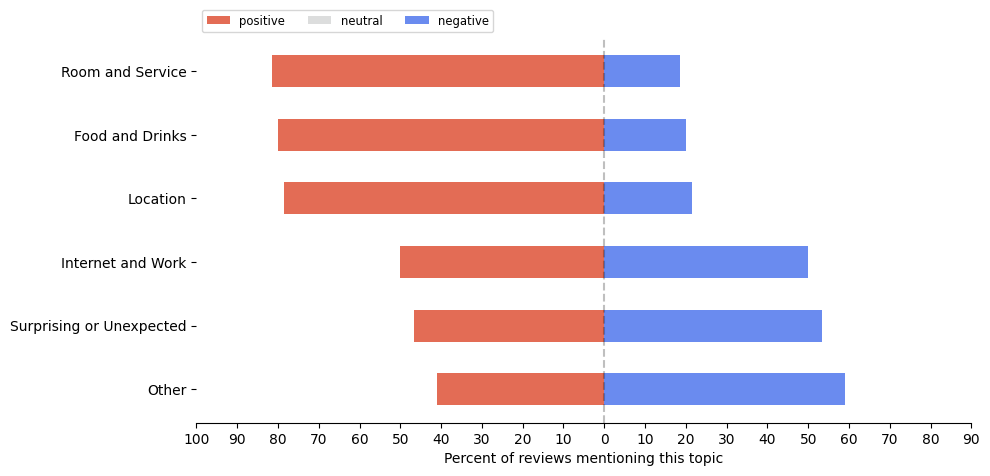

In [114]:
import numpy as np
import matplotlib.pyplot as plt
category_names = ['positive', 'neutral', 'negative']
results = {
    'Room and Service': [letter_percentages["A"]["positive"],0, letter_percentages["A"]["negative"]],
    "Food and Drinks": [letter_percentages["B"]["positive"],0, letter_percentages["B"]["negative"]],
    "Location": [letter_percentages["C"]["positive"],0, letter_percentages["C"]["negative"]],
    "Internet and Work": [letter_percentages["D"]["positive"],0, letter_percentages["D"]["negative"]],
    "Surprising or Unexpected": [letter_percentages["E"]["positive"],0, letter_percentages["E"]["negative"]],
    "Other": [letter_percentages["F"]["positive"],0, letter_percentages["F"]["negative"]]
    }

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*. The order is assumed
        to be from 'Strongly disagree' to 'Strongly aisagree'
    category_names : list of str
        The category labels.
    """
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = data.shape[1]//2
    offsets = data[:, range(middle_index)].sum(axis=1) + data[:, middle_index]/2
    
    # Color Mapping
    category_colors = plt.get_cmap('coolwarm_r')(
        np.linspace(0.15, 0.85, data.shape[1]))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)
    
    # Add Zero Reference Line
    ax.axvline(0, linestyle='--', color='black', alpha=.25)
    
    # X Axis
    ax.set_xlim(-90, 90)
    ax.set_xticks(np.arange(-100, 100, 10))
    ax.xaxis.set_major_formatter(lambda x, pos: str(abs(int(x))))
    
    # Y Axis
    ax.invert_yaxis()
    
    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xlabel('Percent of reviews mentioning this topic')

    # Ledgend
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
    # Set Background Color
    fig.set_facecolor('#FFFFFF')

    return fig, ax


fig, ax = survey(results, category_names)
plt.show()

['positive', 'neutral', 'negative']